# Predprocesiranje skupa podataka

---

## 1. Uvoz knjižnica i postavke

In [1]:
# Knjižnice
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from nltk.metrics import jaccard_distance

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

import contractions

import spacy
nlp = spacy.load('en_core_web_sm')

In [2]:
# Postavke bilježnice
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

---

## 2. Priprema skupa podataka

In [3]:
# Uvoz i pregled skupa podataka
dataset = pd.read_csv("./datasets/dataset_dirty/dataset_dirty.csv")

dataset['title_raw'] = dataset['title']
dataset['description_raw'] = dataset['description']

dataset.head(5)

,category,title,description,image_thumb,image_large,image_hi_res,title_raw,description_raw
0,Automotive,"Funny The More People I Meet The More I Love My Dog Vinyl Sticker Car Decal (6"" Black)","You will receive 1x decals made of the highest quality 651 Oracal Vinyl. All decals are made in the USA and generally ship within 24 hours of purchase. Decal Serpent stands behind its product and will guarantee all decals for 5 years. If you want this decal in another color or size please contact us for customization requests. Our decals can be used on cars, laptops, desktops, house windows, walls, and many other surfaces. Please note, that our decals are die-cut vinyl, not stickers. Application instructions will be included.",https://m.media-amazon.com/images/I/41aTgIj41OL._AC_US40_.jpg,https://m.media-amazon.com/images/I/41aTgIj41OL._AC_.jpg,https://m.media-amazon.com/images/I/51wO6SH3qqL._AC_SL1002_.jpg,"Funny The More People I Meet The More I Love My Dog Vinyl Sticker Car Decal (6"" Black)","You will receive 1x decals made of the highest quality 651 Oracal Vinyl. All decals are made in the USA and generally ship within 24 hours of purchase. Decal Serpent stands behind its product and will guarantee all decals for 5 years. If you want this decal in another color or size please contact us for customization requests. Our decals can be used on cars, laptops, desktops, house windows, walls, and many other surfaces. Please note, that our decals are die-cut vinyl, not stickers. Application instructions will be included."
1,Baby,The First Years American Red Cross Soothing Baby Scale,"Product Description The First Years American Red Cross Baby Scale let you monitor the health of growing breastfed babies and keep track of their health at home. The contour surface can be used with a blanket to keep the baby comfortable on the scale while the tare function helps auto-deduct that extra weight to give accurate weight measurement. It features a large digital display that shows results in various units like pounds, kilograms, or ounces. It also has a button to show the last results and shuts down automatically when not in use to save battery. From the Manufacturer Parents often seek the reassurance of weighing their baby in between pediatrician visits, but this experience can be intimidating for baby. The First Years American Red Cross Soothing Baby Scale has reliable digital accuracy to + or - 10g 0.022 pounds. The Inviting, contoured design is comfortable for lying or sitting baby max and min capacity is 44 pounds to 0.44 pounds. The additional features include easy read LCD display, memory recall of last weight, tare feature to accommodate a baby blanket.",https://m.media-amazon.com/images/I/31EfatyAmWL._SS40_.jpg,https://m.media-amazon.com/images/I/31EfatyAmWL.jpg,https://m.media-amazon.com/images/I/61aCJTAHF1L._SL1500_.jpg,The First Years American Red Cross Soothing Baby Scale,"Product Description The First Years American Red Cross Baby Scale let you monitor the health of growing breastfed babies and keep track of their health at home. The contour surface can be used with a blanket to keep the baby comfortable on the scale while the tare function helps auto-deduct that extra weight to give accurate weight measurement. It features a large digital display that shows results in various units like pounds, kilograms, or ounces. It also has a button to show the last results and shuts down automatically when not in use to save battery. From the Manufacturer Parents often seek the reassurance of weighing their baby in between pediatrician visits, but this experience can be intimidating for baby. The First Years American Red Cross Soothing Baby Scale has reliable digital accuracy to + or - 10g 0.022 pounds. The Inviting, contoured design is comfortable for lying or sitting baby max and min capacity is 44 pounds to 0.44 pounds. The additional features include easy read LCD display, memory recall of last weight, tare feature to accommodate a baby blanke

In [4]:
# Izbacivanje redaka sa NaN vrijednosti
dataset.dropna(inplace=True)

In [5]:
# Prikaz statistike skupa podataka prije čišćenja
total_rows = len(dataset)
print(f"Ukupan broj redaka: {total_rows}")

unique_rows = len(dataset.drop_duplicates(subset=["description"]))
print(f"Broj jedinstvenih redaka: {unique_rows}")

duplicate_rows = total_rows - unique_rows
print(f"Broj duplikata: {duplicate_rows}")

row_char_length = dataset["description"].str.len().tolist()

min_length = min(row_char_length)
print(f"Minimalan broj karaktera: {min_length}")

max_length = max(row_char_length)
print(f"Maksimalan broj karaktera: {max_length}")

avg_length = sum(row_char_length) / len(row_char_length)
print(f"Prosječan broj karaktera: {avg_length:.2f}")

Ukupan broj redaka: 126134
Broj jedinstvenih redaka: 112987
Broj duplikata: 13147
Minimalan broj karaktera: 1
Maksimalan broj karaktera: 20326
Prosječan broj karaktera: 628.95


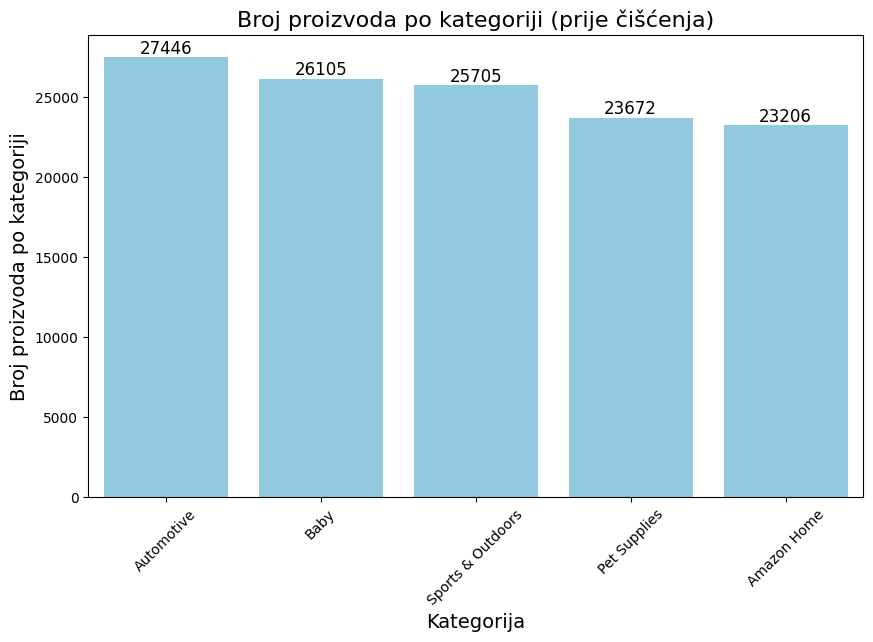

In [6]:
# Prikaz broja članaka po kategoriji (prije čišćenja)
category_counts = dataset['category'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, color='skyblue')
plt.xlabel('Kategorija', fontsize=14)
plt.ylabel('Broj proizvoda po kategoriji', fontsize=14)
plt.title('Broj proizvoda po kategoriji (prije čišćenja)', fontsize=16)
plt.xticks(rotation=45)

for i, count in enumerate(category_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

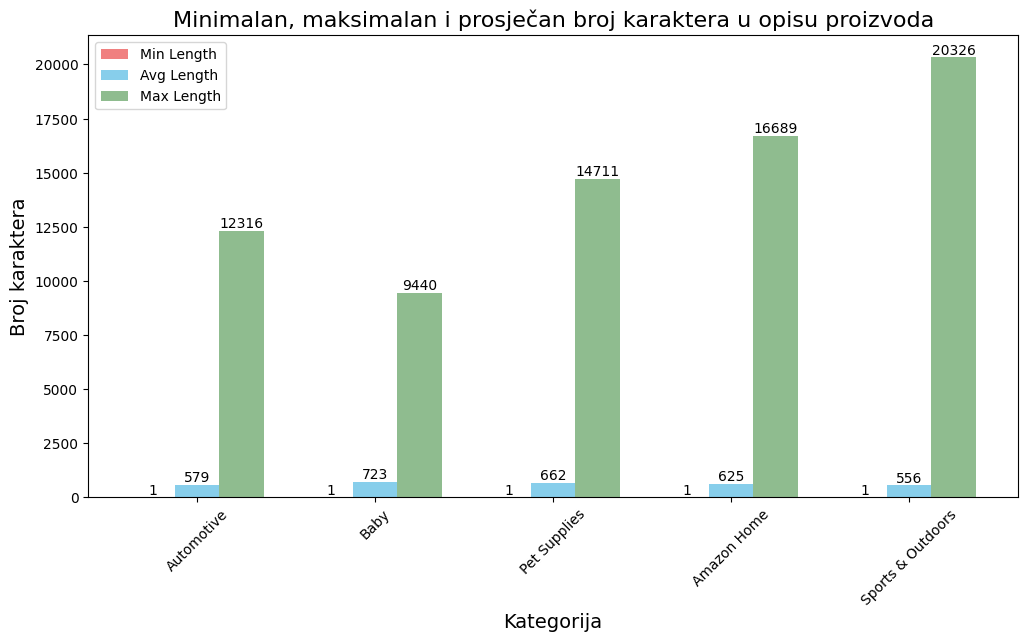

In [7]:
# Minimalan, maksimalan i prosječan broj karaktera prije čišćenja prema kategoriji
categories = []
min_lengths = []
max_lengths = []
avg_lengths = []

for category in dataset["category"].unique():
    category_df = dataset[dataset["category"] == category]
    categories.append(category)
    min_lengths.append(category_df["description"].str.len().min())
    max_lengths.append(category_df["description"].str.len().max())
    avg_lengths.append(category_df["description"].str.len().mean())

stats_df = pd.DataFrame({
    "Category": categories,
    "Min Length": min_lengths,
    "Max Length": max_lengths,
    "Avg Length": avg_lengths
})

bar_width = 0.25
categories = stats_df["Category"]
index = np.arange(len(categories))

plt.figure(figsize=(12, 6))

plt.bar(index, stats_df["Min Length"], bar_width, label='Min Length', color='lightcoral')
plt.bar(index + bar_width, stats_df["Avg Length"], bar_width, label='Avg Length', color='skyblue')
plt.bar(index + 2 * bar_width, stats_df["Max Length"], bar_width, label='Max Length', color='darkseagreen')

for i in range(len(categories)):
    plt.text(i, stats_df["Min Length"][i] + 5, f'{stats_df["Min Length"][i]}', ha='center', va='bottom', fontsize=10)
    plt.text(i + bar_width, stats_df["Avg Length"][i] + 5, f'{int(stats_df["Avg Length"][i])}', ha='center', va='bottom', fontsize=10)
    plt.text(i + 2 * bar_width, stats_df["Max Length"][i] + 5, f'{stats_df["Max Length"][i]}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Kategorija', fontsize=14)
plt.ylabel('Broj karaktera', fontsize=14)
plt.title('Minimalan, maksimalan i prosječan broj karaktera u opisu proizvoda', fontsize=16)
plt.xticks(index + bar_width, categories, rotation=45)
plt.legend()
plt.show()

In [8]:
# Pretvaranje svih slova u mala slova
dataset['title'] = dataset['title'].str.lower()
dataset['description'] = dataset['description'].str.lower()
dataset['category'] = dataset['category'].str.lower()

# Proširenje riječi npr. don't u do not
dataset["description"] = dataset["description"].apply(lambda x: contractions.fix(x))
dataset["title"] = dataset["title"].apply(lambda x: contractions.fix(x))

# Brisanje riječi koje sadrže ne ASCII karaktere
def remove_non_ascii_words(text):
    return ' '.join([word for word in text.split() if not any(ord(char) > 127 for char in word)])

dataset["description"] = dataset["description"].astype(str).apply(remove_non_ascii_words)
dataset["title"] = dataset["title"].astype(str).apply(remove_non_ascii_words)

# Uklanjanje ne ASCII karaktera
dataset["description"] = dataset["description"].str.encode("ascii", "ignore").str.decode("ascii")
dataset["title"] = dataset["title"].str.encode("ascii", "ignore").str.decode("ascii")

# Uklanjanje teksta unutar zagrada
dataset["description"] = dataset["description"].str.replace(r"[\(\[\{][^\)\]\}]*[\)\]\}]", "", regex=True)
dataset["title"] = dataset["title"].str.replace(r"[\(\[\{][^\)\]\}]*[\)\]\}]", "", regex=True)

# Uklanjanje HTML tagova
dataset['description'] = dataset['description'].str.replace("<br /><br />", " ")
dataset['title'] = dataset['title'].str.replace("<br /><br />", " ")

# Uklanjanje jednostrukih i dvostrukih navodnika
dataset['description'] = dataset['description'].str.replace("'", "")
dataset['title'] = dataset['title'].str.replace("'", "")

dataset['description'] = dataset['description'].str.replace('"', "")
dataset['title'] = dataset['title'].str.replace('"', "")

# Uklanjanje svih znakova osim slova i brojeva
dataset['description'] = dataset['description'].str.replace("[^a-zA-Z0-9]+", " ", regex=True)
dataset['title'] = dataset['title'].str.replace("[^a-zA-Z0-9]+", " ", regex=True)

# Uklanjanje jednog slova osim "I" i "a"
dataset['description'] = dataset['description'].str.replace(r"\b(?![aA|I])[a-zA-Z]\b", "", regex=True)
dataset['title'] = dataset['title'].str.replace(r"\b(?![aA|I])[a-zA-Z]\b", "", regex=True)

# Uklanjanje opisa koji imaju manje od X karaktera
dataset = dataset[(dataset["description"].str.len() >= 200)]

# Zamjena više razmaka sa jednim razmakom
dataset['description'] = dataset['description'].str.replace(r"\s+", " ", regex=True)
dataset['title'] = dataset['title'].str.replace(r"\s+", " ", regex=True)

# Uklanjanje duplikata i praznih unosa
dataset.dropna(inplace=True)
dataset.drop_duplicates(subset=["description"], inplace=True)

In [9]:
# Prikaz statistike skupa podataka poslje čišćenja
total_rows = len(dataset)
print(f"Ukupan broj redaka: {total_rows}")

unique_rows = len(dataset.drop_duplicates(subset=["description"]))
print(f"Broj jedinstvenih redaka: {unique_rows}")

duplicate_rows = total_rows - unique_rows
print(f"Broj duplikata: {duplicate_rows}")

row_char_length = dataset["description"].str.len().tolist()

min_length = min(row_char_length)
print(f"Minimalan broj karaktera: {min_length}")

max_length = max(row_char_length)
print(f"Maksimalan broj karaktera: {max_length}")

avg_length = sum(row_char_length) / len(row_char_length)
print(f"Prosječan broj karaktera: {avg_length:.2f}")

Ukupan broj redaka: 87105
Broj jedinstvenih redaka: 87105
Broj duplikata: 0
Minimalan broj karaktera: 195
Maksimalan broj karaktera: 19016
Prosječan broj karaktera: 746.95


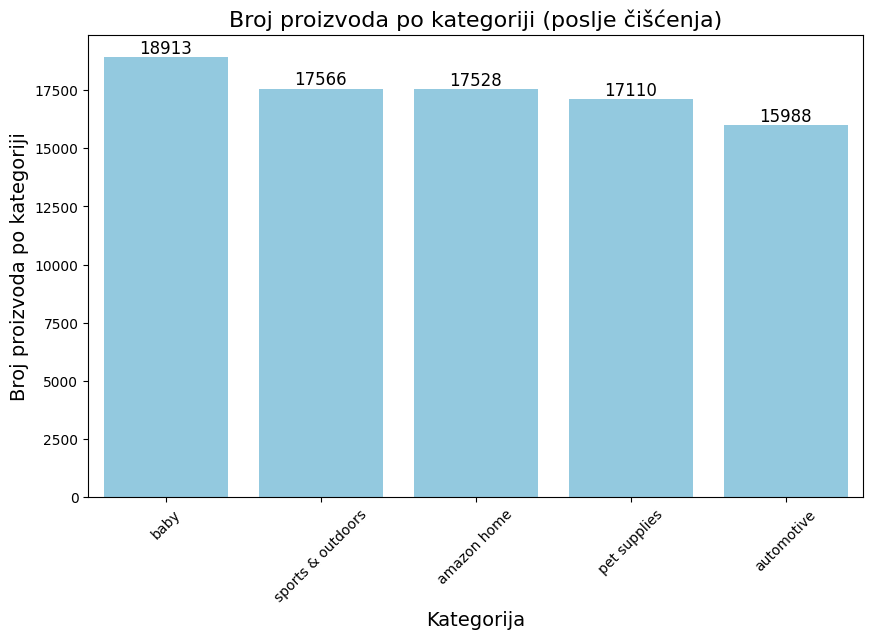

In [10]:
# Prikaz broja članaka po kategoriji (poslje čišćenja)
category_counts = dataset['category'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, color='skyblue')
plt.xlabel('Kategorija', fontsize=14)
plt.ylabel('Broj proizvoda po kategoriji', fontsize=14)
plt.title('Broj proizvoda po kategoriji (poslje čišćenja)', fontsize=16)
plt.xticks(rotation=45)

for i, count in enumerate(category_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

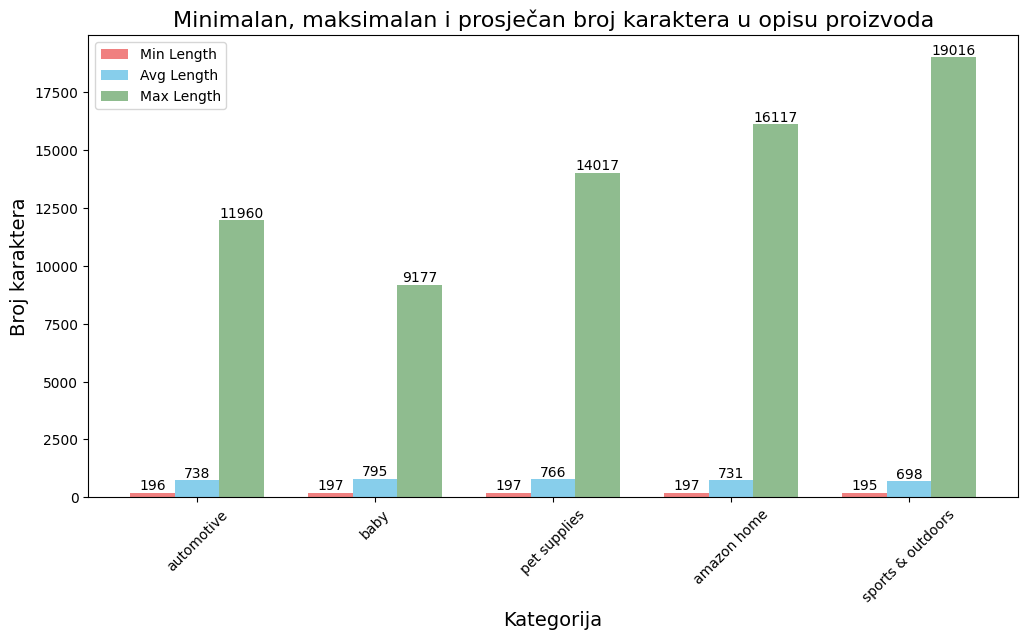

In [11]:
# Minimalan, maksimalan i prosječan broj karaktera poslje čišćenja prema kategoriji
categories = []
min_lengths = []
max_lengths = []
avg_lengths = []

for category in dataset["category"].unique():
    category_df = dataset[dataset["category"] == category]
    categories.append(category)
    min_lengths.append(category_df["description"].str.len().min())
    max_lengths.append(category_df["description"].str.len().max())
    avg_lengths.append(category_df["description"].str.len().mean())

stats_df = pd.DataFrame({
    "Category": categories,
    "Min Length": min_lengths,
    "Max Length": max_lengths,
    "Avg Length": avg_lengths
})

bar_width = 0.25
categories = stats_df["Category"]
index = np.arange(len(categories))

plt.figure(figsize=(12, 6))

plt.bar(index, stats_df["Min Length"], bar_width, label='Min Length', color='lightcoral')
plt.bar(index + bar_width, stats_df["Avg Length"], bar_width, label='Avg Length', color='skyblue')
plt.bar(index + 2 * bar_width, stats_df["Max Length"], bar_width, label='Max Length', color='darkseagreen')

for i in range(len(categories)):
    plt.text(i, stats_df["Min Length"][i] + 5, f'{stats_df["Min Length"][i]}', ha='center', va='bottom', fontsize=10)
    plt.text(i + bar_width, stats_df["Avg Length"][i] + 5, f'{int(stats_df["Avg Length"][i])}', ha='center', va='bottom', fontsize=10)
    plt.text(i + 2 * bar_width, stats_df["Max Length"][i] + 5, f'{stats_df["Max Length"][i]}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Kategorija', fontsize=14)
plt.ylabel('Broj karaktera', fontsize=14)
plt.title('Minimalan, maksimalan i prosječan broj karaktera u opisu proizvoda', fontsize=16)
plt.xticks(index + bar_width, categories, rotation=45)
plt.legend()
plt.show()

---

## 4. Pretvorba kategoričkih značajki u numeričke


In [12]:
# Pretvorba kategoričkih značajki stupca "category" u numeričke
label_encoder = LabelEncoder()
dataset['category_encoded'] = label_encoder.fit_transform(dataset['category'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Oznake kategorija:", label_mapping)

Oznake kategorija: {'amazon home': np.int64(0), 'automotive': np.int64(1), 'baby': np.int64(2), 'pet supplies': np.int64(3), 'sports & outdoors': np.int64(4)}


---

## 5. Stvaranje tokena i lematizacija

In [13]:
# Stvaranje tokena
def tokenize_and_remove_stopwords(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return tokens

dataset["description_tokens"] = dataset["description"].apply(tokenize_and_remove_stopwords)

# Lematizacija tokena
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

dataset["description_tokens"] = dataset["description_tokens"].apply(lemmatize_tokens)

# Brisanje praznih tokena u listi npr. [, token1, token2,,token3,a,...]
def clean_empty_tokens(tokens):
    return [token for token in tokens if token.strip() and len(token) > 1]

dataset["description_tokens"] = dataset["description_tokens"].apply(clean_empty_tokens)

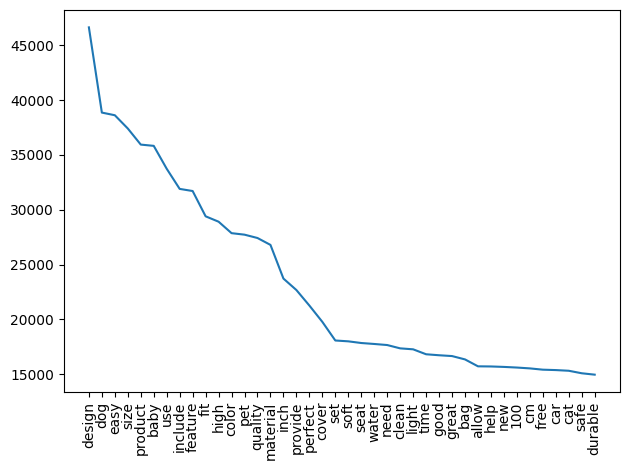

Popis 10,000 najčešćih riječi:
['design', 'dog', 'easy', 'size', 'product', 'baby', 'use', 'include', 'feature', 'fit', 'high', 'color', 'pet', 'quality', 'material', 'inch', 'provide', 'perfect', 'cover', 'set', 'soft', 'seat', 'water', 'need', 'clean', 'light', 'time', 'good', 'great', 'bag', 'allow', 'help', 'new', '100', 'cm', 'free', 'car', 'cat', 'safe', 'durable', 'make', 'weight', 'long', 'small', 'package', 'hand', 'large', 'child', 'home', 'add', 'come', 'look', 'year', 'pad', 'gift', 'food', 'steel', 'dry', 'style', 'offer', 'item', 'toy', 'comfortable', 'vehicle', 'day', 'comfort', 'easily', 'handle', 'bottle', 'like', 'place', 'fabric', 'safety', 'little', 'length', 'storage', 'room', 'bed', 'natural', 'system', 'black', 'cotton', 'create', 'ensure', '10', 'measure', 'different', '12', 'strap', 'specification', 'love', 'air', 'work', 'adjustable', 'standard', 'pocket', 'protect', 'piece', 'replacement', 'brand', 'feel', 'machine', 'lead', 'support', 'wash', 'way', 'availab

In [14]:
# Prikaz i popis najčešćih riječi
freq = {}
for tokens in dataset["description_tokens"].to_list():
    for token in tokens:
        if token in freq:
            freq[token] += 1
        else:
            freq[token] = 1

freq_sorted = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))

most_common_words_number = 40

plt.plot(list(freq_sorted.keys())[:most_common_words_number], list(freq_sorted.values())[:most_common_words_number])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"Popis 10,000 najčešćih riječi:\n{list(freq_sorted.keys())[:10000]}")

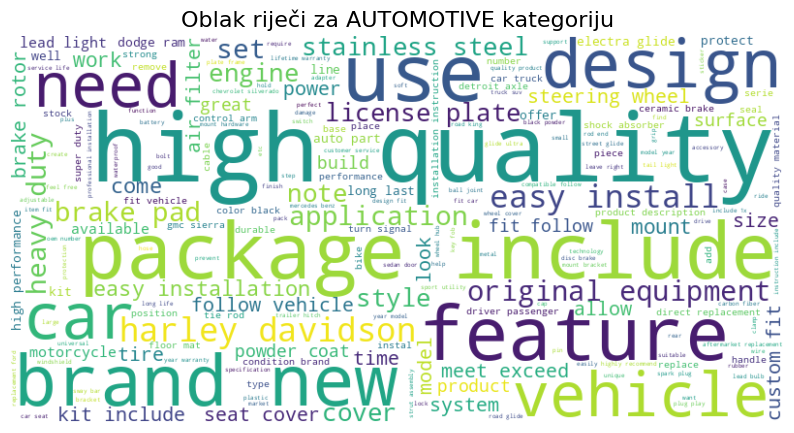

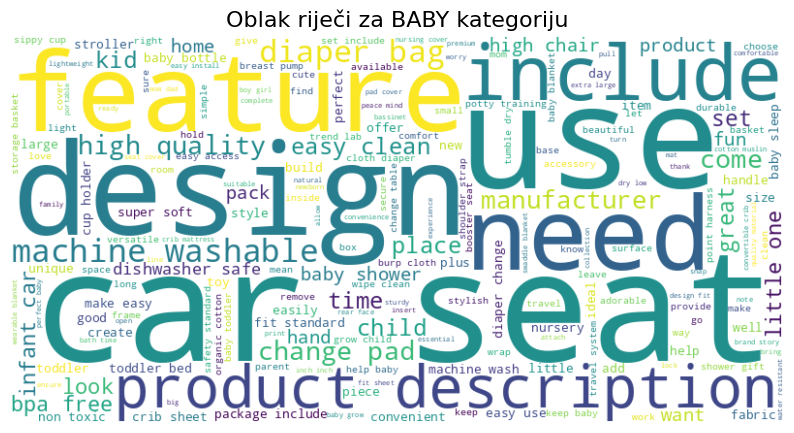

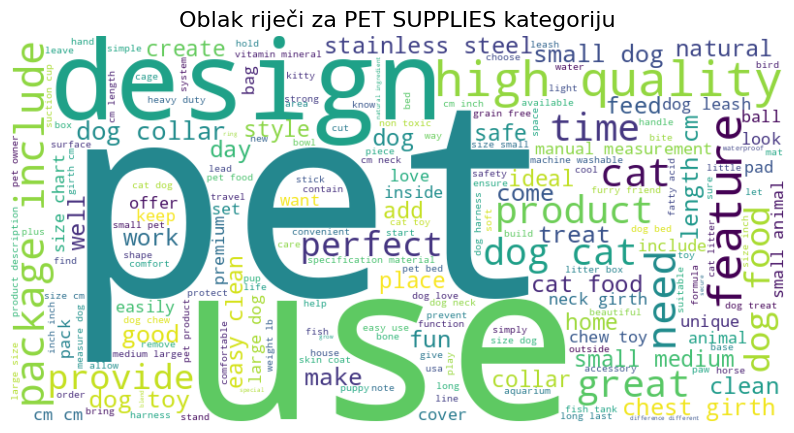

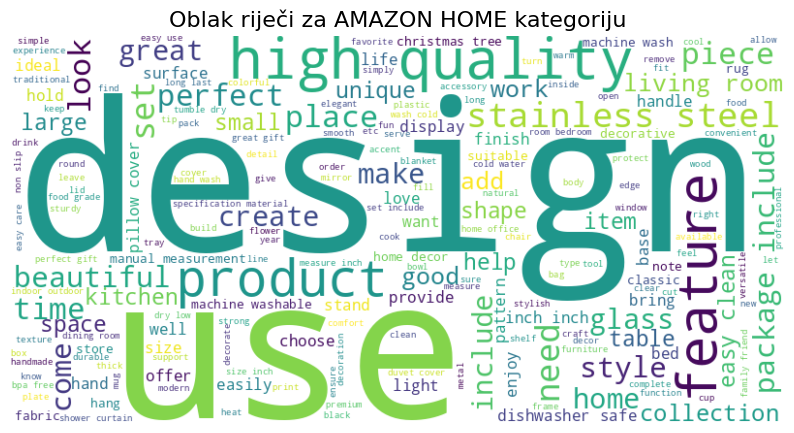

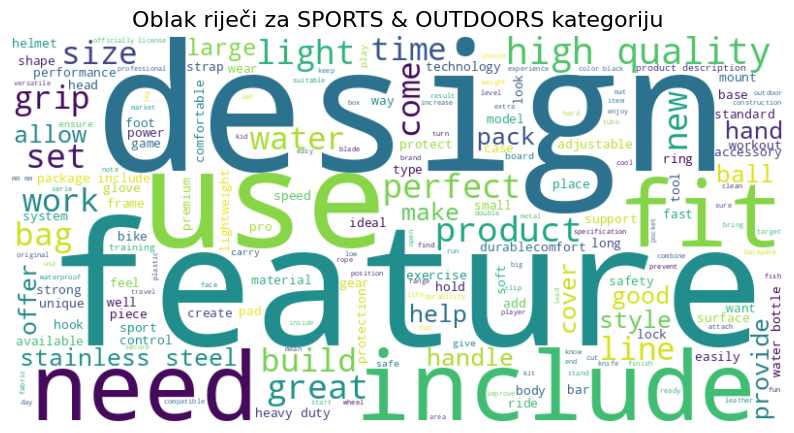

In [15]:
# Prikaz oblaka riječi po kategorijama
def generate_word_cloud(category):
    text = ' '.join([' '.join(tokens) for tokens in dataset[dataset['category'] == category]['description_tokens']])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Oblak riječi za {category.upper()} kategoriju', fontsize=16)
    plt.show()

for category in dataset['category'].unique():
    generate_word_cloud(category)

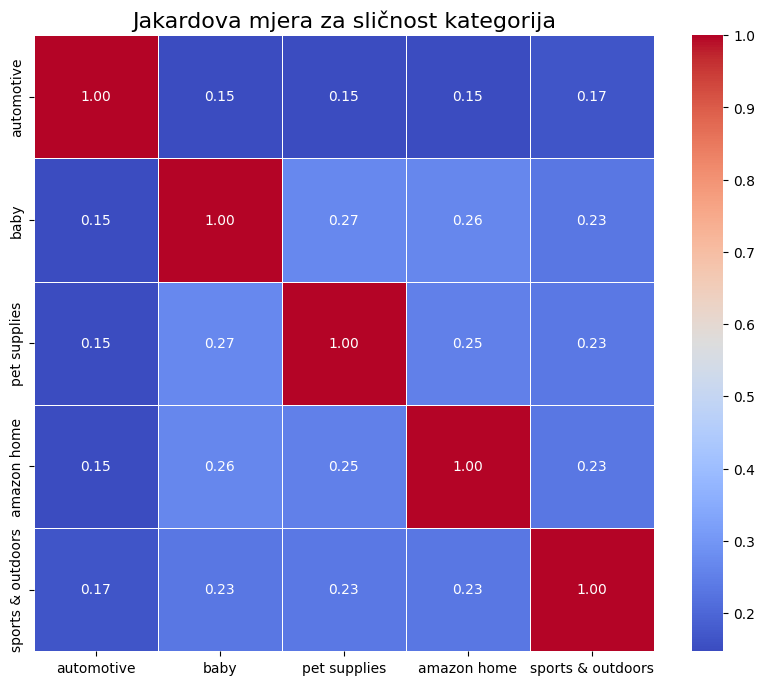

In [16]:
# Sličnost između tokena različitih kategorija
def jaccard_similarity(set1, set2):
    return 1 - jaccard_distance(set1, set2)

categories = dataset["category"].unique()
similarity_matrix = pd.DataFrame(index=categories, columns=categories)

for cat1 in categories:
    tokens1 = set(dataset[dataset["category"] == cat1]["description_tokens"].explode())
    for cat2 in categories:
        tokens2 = set(dataset[dataset["category"] == cat2]["description_tokens"].explode())
        similarity_score = jaccard_similarity(tokens1, tokens2)
        similarity_matrix.loc[cat1, cat2] = similarity_score

similarity_matrix = similarity_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Jakardova mjera za sličnost kategorija', fontsize=16)
plt.show()

In [17]:
# Lematizacija teksta
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return " ".join(lemmatized_tokens)

dataset["description_lemmatized"] = dataset["description"].apply(lemmatize_text)
dataset["title_lemmatized"] = dataset["title"].apply(lemmatize_text)

---

## 6. Priprema skupa za treniranje i testiranje

In [18]:
order_columns = ['category', 'category_encoded', 'title_raw', 'title', 'title_lemmatized', 'description_raw', 'description', 'description_lemmatized', 'description_tokens', 'image_thumb', 'image_large', 'image_hi_res']
dataset = dataset[order_columns]

In [19]:
dataset_copy = dataset.copy()

In [20]:
# Odabir X redaka za svaku kategoriju zbog balanasa podataka
NUM_SAMPLES_PER_CATEGORY = 10000

dataset_preprocessed = dataset_copy.copy()

dataset_clean = dataset_preprocessed.groupby('category', group_keys=False).sample(n=NUM_SAMPLES_PER_CATEGORY, random_state=42, replace=False)
dataset_remaining = dataset_preprocessed.drop(dataset_clean.index)

dataset_clean = shuffle(dataset_clean, random_state=42).reset_index(drop=True)
dataset_remaining = shuffle(dataset_remaining, random_state=42).reset_index(drop=True)

dataset_clean.to_csv("./datasets/dataset_clean/dataset_clean.csv", index=False)
dataset_remaining.to_csv("./datasets/dataset_remaining/dataset_remaining.csv", index=False)

In [21]:
# Pregled pripremljenog skupa podataka
dataset.head(10)

,category,category_encoded,title_raw,title,title_lemmatized,description_raw,description,description_lemmatized,description_tokens,image_thumb,image_large,image_hi_res
0,automotive,1,"Funny The More People I Meet The More I Love My Dog Vinyl Sticker Car Decal (6"" Black)",funny the more people meet the more love my dog vinyl sticker car decal,funny the more people meet the more love my dog vinyl sticker car decal,"You will receive 1x decals made of the highest quality 651 Oracal Vinyl. All decals are made in the USA and generally ship within 24 hours of purchase. Decal Serpent stands behind its product and will guarantee all decals for 5 years. If you want this decal in another color or size please contact us for customization requests. Our decals can be used on cars, laptops, desktops, house windows, walls, and many other surfaces. Please note, that our decals are die-cut vinyl, not stickers. Application instructions will be included.",you will receive 1x decals made of the highest quality 651 oracal vinyl all decals are made in the usa and generally ship within 24 hours of purchase decal serpent stands behind its product and will guarantee all decals for 5 years if you want this decal in another color or size please contact us for customization requests our decals can be used on cars laptops desktops house windows walls and many other surfaces please note that our decals are die cut vinyl not stickers application instructions will be included,you will receive 1x decal make of the high quality 651 oracal vinyl all decal be make in the usa and generally ship within 24 hour of purchase decal serpent stand behind its product and will guarantee all decal for 5 year if you want this decal in another color or size please contact we for customization request our decal can be use on car laptop desktop house window wall and many other surface please note that our decal be die cut vinyl not sticker application instruction will be include,"[receive, 1x, decal, high, quality, 651, oracal, vinyl, decal, usa, generally, ship, 24, hour, purchase, decal, serpent, stand, product, guarantee, decal, year, want, decal, color, size, contact, customization, request, decal, car, laptop, desktop, house, windows, wall, surface, note, decal, die, cut, vinyl, sticker, application, instruction, include]",https://m.media-amazon.com/images/I/41aTgIj41OL._AC_US40_.jpg,https://m.media-amazon.com/images/I/41aTgIj41OL._AC_.jpg,https://m.media-amazon.com/images/I/51wO6SH3qqL._AC_SL1002_.jpg
1,baby,2,The First Years American Red Cross Soothing Baby Scale,the first years american red cross soothing baby scale,the first year american red cross soothe baby scale,"Product Description The First Years American Red Cross Baby Scale let you monitor the health of growing breastfed babies and keep track of their health at home. The contour surface can be used with a blanket to keep the baby comfortable on the scale while the tare function helps auto-deduct that extra weight to give accurate weight measurement. It features a large digital display that shows results in various units like pounds, kilograms, or ounces. It also has a button to show the last results and shuts down automatically when not in use to save battery. From the Manufacturer Parents often seek the reassurance of weighing their baby in between pediatrician visits, but this experience can be intimidating for baby. The First Years American Red Cross Soothing Baby Scale has reliable digital accuracy to + or - 10g 0.022 pounds. The Inviting, contoured design is comfortable for lying or sitting baby max and min capacity is 44 pounds to 0.44 pounds. The additional features include easy read LCD display, memory recall of last weight, tare feature to accommodate a baby blanket.",product description the first years american red cross baby scale let you monitor the health of growing breastfed babies and keep track of their health at home the contour surface can be used with a blanket to keep the baby comfortable on

In [22]:
# Pregled pripremljenog skupa podataka
dataset_remaining.head(10)

,category,category_encoded,title_raw,title,title_lemmatized,description_raw,description,description_lemmatized,description_tokens,image_thumb,image_large,image_hi_res
0,baby,2,"Bugaboo Donkey 2 Mono Baby Stroller, Foldable Stroller, Converts into Twin Side-by-Side Sibling Stroller, from Birth Baby Stroller, Infant Stroller, Multiple Seat Positions, Alu/Classic Grey Mélange",bugaboo donkey 2 mono baby stroller foldable stroller converts into twin side by side sibling stroller from birth baby stroller infant stroller multiple seat positions alu classic grey,bugaboo donkey 2 mono baby stroller foldable stroller convert into twin side by side sible stroller from birth baby stroller infant stroller multiple seat position alu classic grey,"Thinking about expanding your family one day? The Bugaboo Donkey 2 Mono can be converted to a side-by-side double stroller with the duo extension set (available for purchase separately). With just three simple clicks, your baby stroller is ready for two. Even with the side-by-side configuration, the double stroller will still fit through standard doorways, so getting out and about feels all the more manageable. From groceries to toys for your child, the handy side luggage basket is ideal for those grab-and-go moments and keeping your essentials at hand. It comes complete with pockets and a cover to keep your belongings organized and safe. Thanks to the front swivel wheels, tight turn radius, and fully adjustable handlebar, the Bugaboo Donkey 2 is easy to push and maneuver with one hand. No terrain is too rough for these big foam-filled tires, which make every ride smooth and seamless. It can even be converted to the two-wheel position for an easier ride through sand or snow. The road less traveled is no match for the Donkey 2, even when the stroller is fully loaded or converted to a double stroller. Every mom knows that a stroller that reclines is a must. Effortlessly switch the position of the seat in your reclinable stroller to suit your child’s mood—facing you for extra contact or facing the world when they’re ready to take it all in. If you’re strolling with two children, the side by side sibling stroller promotes interaction between the children and parent at eye level, forming the ultimate bond. Our double strollers also have a 3-position recline for napping on the go. Recline the seat for nap time and position it upright when they want to take in the sights. As with every Bugaboo folding stroller, the Donkey 2 has undergone over 1,500 safety tests for quality you can trust. Durable, long-lasting, and comfortably maneuverable, it’s perfect for parents who are looking for spacious storage or planning to expand their family.",thinking about expanding your family one day the bugaboo donkey 2 mono can be converted to a side by side double stroller with the duo extension set with just three simple clicks your baby stroller is ready for two even with the side by side configuration the double stroller will still fit through standard doorways so getting out and about feels all the more manageable from groceries to toys for your child the handy side luggage basket is ideal for those grab and go moments and keeping your essentials at hand it comes complete with pockets and a cover to keep your belongings organized and safe thanks to the front swivel wheels tight turn radius and fully adjustable handlebar the bugaboo donkey 2 is easy to push and maneuver with one hand no terrain is too rough for these big foam filled tires which make every ride smooth and seamless it can even be converted to the two wheel position for an easier ride through sand or snow the road less traveled is no match for the donkey 2 even when the stroller is fully loaded or converted to a double stroller every mom knows that a stroller that reclines is a must effortlessly switch the position of the seat in your reclinable stroller to suit your you for extra contact or facing the world when they are ready to take it all in if you a